In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pca import pca
import numpy as np

In [2]:
# data from http://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#
# read in the data
df = pd.read_csv('divorce/divorce.csv', sep=';')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
df.describe()
# There are a total of 54 questions (answered 0-4) and whether it lead to a divorce (Class - 0/1)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


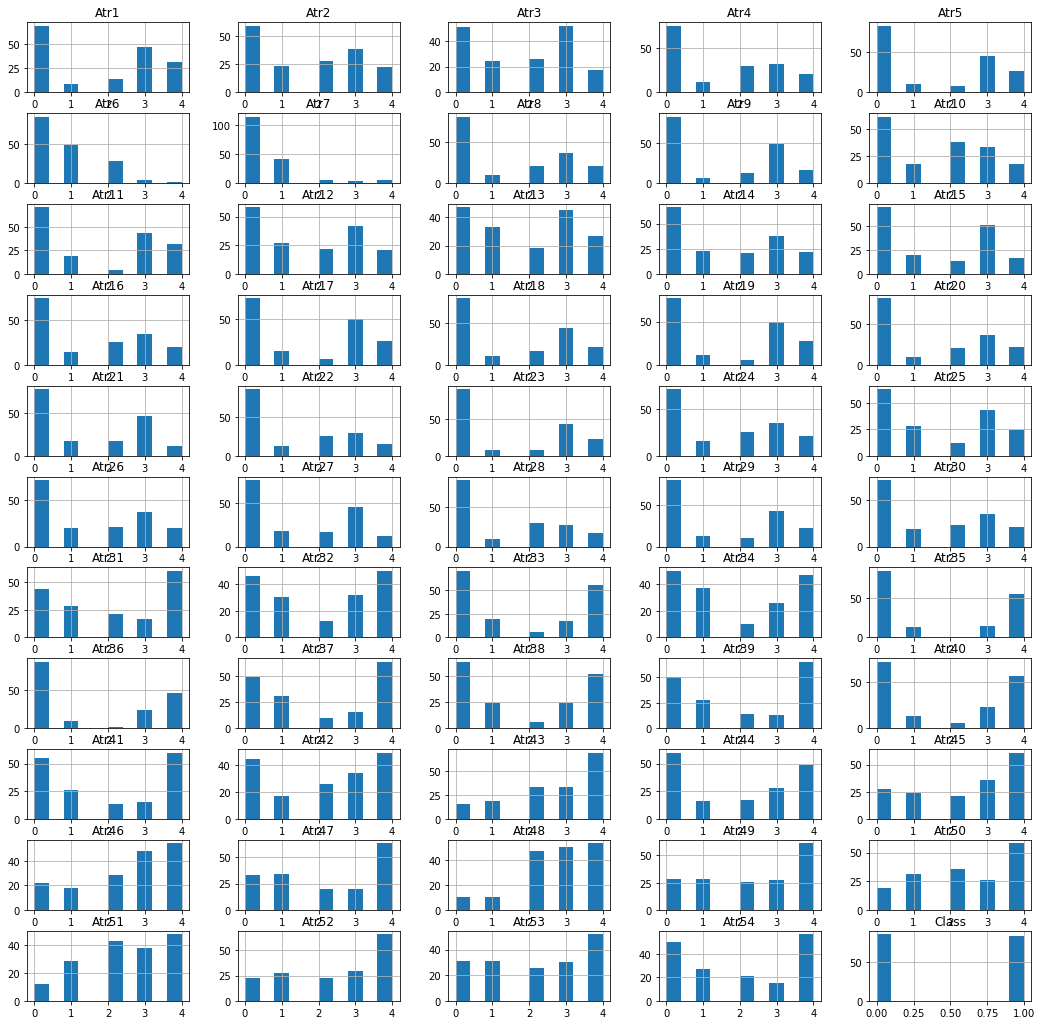

In [4]:
# To view the distribution of the data, for each question a histogram is generated
fig, axis = plt.subplots(11,5,figsize=(18, 18))
df.hist(ax=axis)
plt.show()

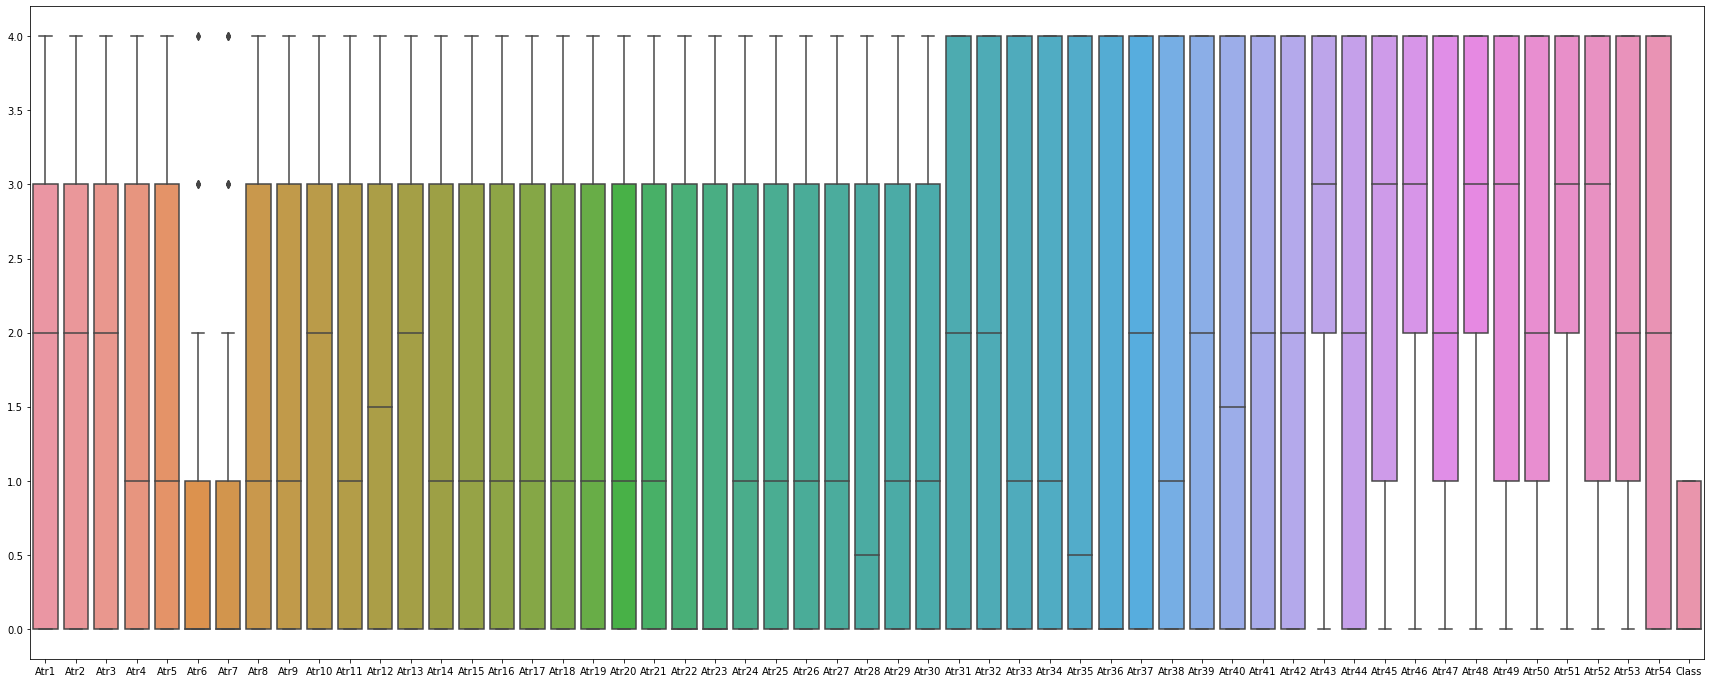

In [5]:
plt.figure(figsize=(30,12))
sns.boxplot(data=df)
plt.show()
# Note, please double click the boxplot to better view the data.

According to the paper from the researchers with this paper, the divorces were mainly explained by 6 features. Thus, to reduce dimensionality a PCA will be performed to observe the top features. This will be used to train the model.

In [6]:
# We do not need the labels (Divorce, no divorce)
df_unlabeled = df.drop('Class', axis=1)
divorced = df['Class']

In [7]:
# The paper mentioned 6 components explaining most of the data, thus we'll use this suggestion.
model = pca(n_components=6, normalize=False)
results = model.fit_transform(df_unlabeled)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [54] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


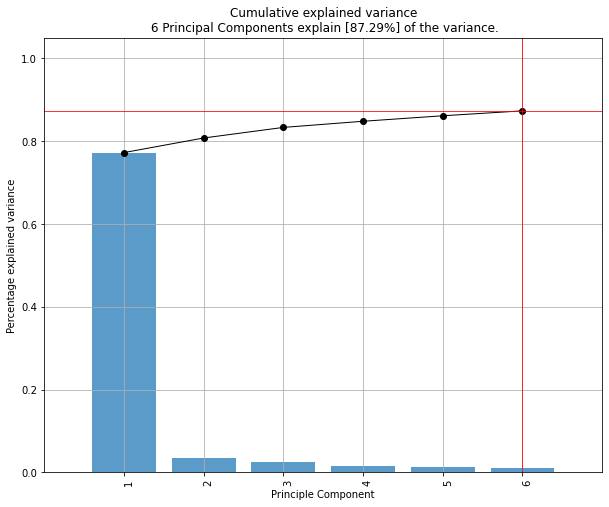

<Figure size 432x288 with 0 Axes>

In [8]:
model.plot(figsize=(10,8))
plt.show()

[pca] >Plot PC1 vs PC2 with loadings.


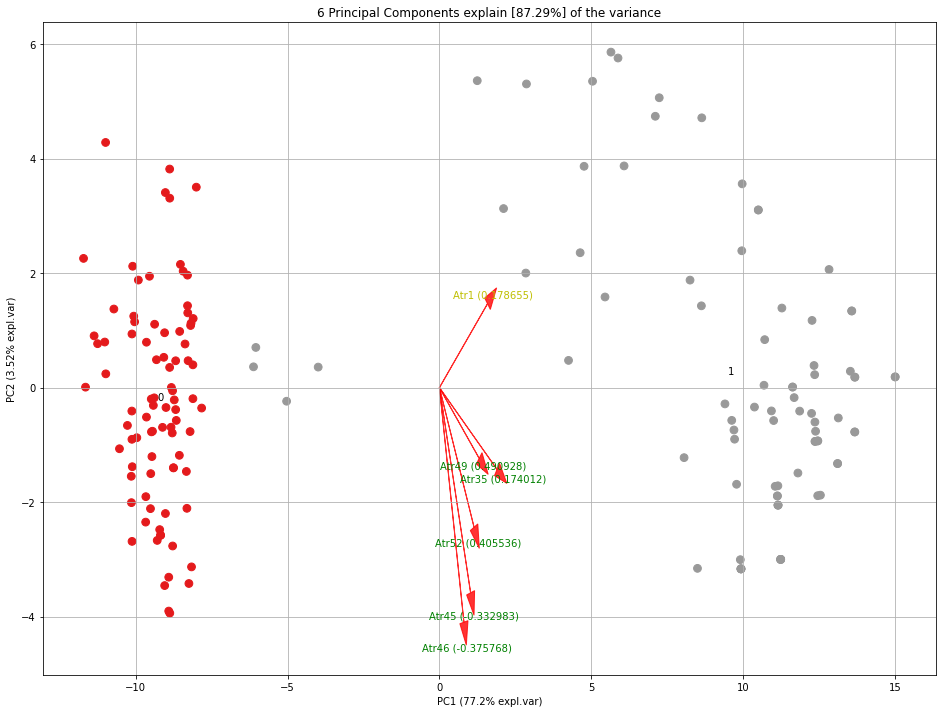

In [9]:
model.biplot(n_feat=6,  legend=False, figsize=(16,12), y=divorced , label=True)
plt.show()

In [10]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


The main features to affect whether a divorce happens seems to be: 'Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52'.

In [11]:
# In the selection we include the label
df_select = df[['Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52', 'Class']]
df_select

,Atr1,Atr35,Atr45,Atr46,Atr49,Atr52,Class
0,2,0,3,2,3,3,1
1,4,0,2,2,4,4,1
2,2,1,2,3,1,2,1
3,3,1,3,2,3,2,1
4,2,0,2,2,3,2,1
...,...,...,...,...,...,...,...
165,0,0,0,1,1,2,0
166,0,1,3,4,2,3,0
167,1,0,2,3,0,3,0
168,0,0,4,3,2,4,0


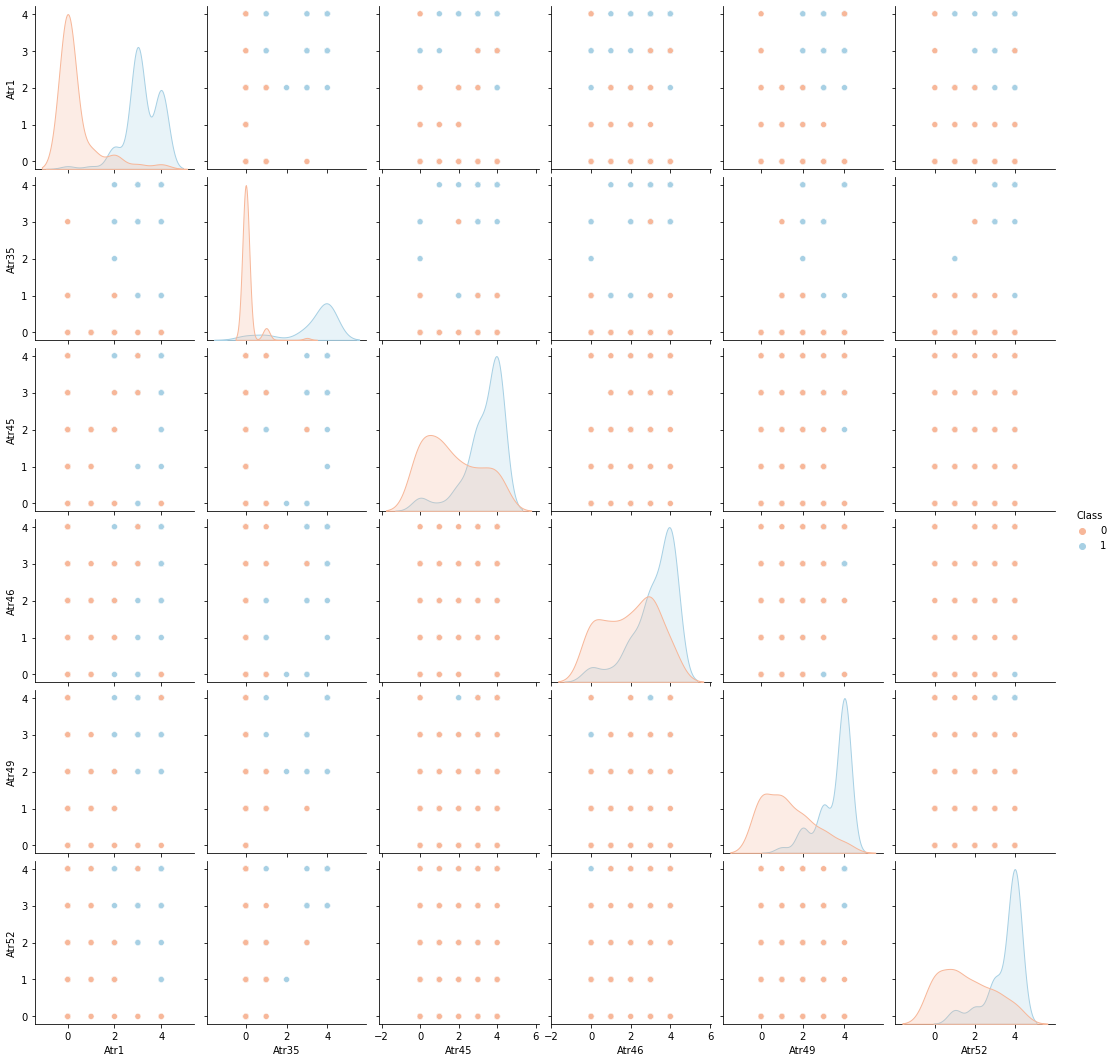

In [12]:
sns.pairplot(data=df_select, hue='Class', palette='RdBu')

Validate model with https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

In [14]:
cols = ['Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52']
y = np.array(df['Class'])
X = np.array(df[cols])
X.shape

(170, 6)

In [17]:
# Split the data in train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
# Train the model
# Why would you need a LogisticRegression model in this specific case?
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
history = logreg.fit(X_train, y_train)

In [20]:
# Evaluate the trained model using the test data.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print ('=== [confusion matrix] ==='.center(54))
print(confusion_matrix)
print ('')
print ('=== [classification report] ==='.center(54))
print(classification_report(y_test, y_pred))

              === [confusion matrix] ===              
[[22  2]
 [ 0 27]]

           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.93      1.00      0.96        27

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



In [21]:
# So what does our model look like?
print(logreg.coef_)

[[ 1.37665211  1.35383413  0.07931664 -0.53674526  0.94601462  0.45319393]]


In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.19802950859533486